# Neural Network

Uma rede neural consiste em unidades (neurônios), organizadas em camadas, que convertem um vetor de entrada em alguma saída. Cada unidade recebe uma entrada, aplica uma função (geralmente não linear) a ela e depois passa a saída para a próxima camada. 
A saída da unidade alimenta todas as unidades na próxima camada, mas não há feedback para a camada anterior.  


Nesse exemplo foi usado o MLPClassifier que treina iterativamente uma vez que, a cada passo de tempo, as derivadas 
parciais da função de perda em relação aos parâmetros do modelo são calculadas para atualizar os parâmetros.  

**Hiperparâmetros:**

- hidden_layer_sizes - Número de neurônios na camada oculta
- max_iter - Número máximo de iterações
- alpha - Termo de regularização
- solver - Otimizador baseado em gradiente estocástico proposto por Kingma, Diederik e Jimmy Ba
- verbose - Se deve imprimir mensagens de progresso.
- tol - Ponto de convergência
- random_state - Gerador de números aleatórios
- learning_rate_init - Taxa de aprendizado constante dada por.


## Biblioteca e dados

In [160]:
from sklearn.neural_network import MLPClassifier
from load_and_prepare_data import load_and_prepare_data
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn


import time


# Recebe o arquivo de dataset, nomeia as labels e mostra o dataframe
data = '~/Letter-Recognition/data_set/letter-recognition.data'
columns = ['lettr','x-box','y-box','width','high','onpix','x-bar','y-bar','x2bar','y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx']
df = pd.read_csv(data, names = columns)
df

# Retirando as classes para selecionar apenas as features
features = np.array(df.drop('lettr', 1))

# Selecionar apenas as classes
letter = np.array(df.lettr)

order_letter = np.sort(letter)
alfabeto = sorted(set(order_letter))

# Divide os dados em conjunto de treinamento e em conjunto de teste
features_train, features_test, letter_train, letter_test = train_test_split(features, letter, random_state=0)




## Treinamento

In [145]:
start = time.time()

# Treinamento
mlpc = MLPClassifier(hidden_layer_sizes=(2000,), # Número de neurônios na camada oculta
                     #max_iter=3, # Número máximo de iterações
                     alpha=1e-5, # Termo de regularização
                    solver='adam', # Otimizador baseado em gradiente estocástico proposto por Kingma, Diederik e Jimmy Ba
                     verbose=1, # Se deve imprimir mensagens de progresso.
                     tol=1e-4, # Ponto de convergência
                     random_state=0, # Gerador de números aleatórios
                    learning_rate_init=.001) # Taxa de aprendizado constante dada por



mlpc.fit(features_train, letter_train).predict(features_test)


Iteration 1, loss = 1.73659636
Iteration 2, loss = 1.06462062
Iteration 3, loss = 0.89243143
Iteration 4, loss = 0.79916622
Iteration 5, loss = 0.70721669
Iteration 6, loss = 0.65472126
Iteration 7, loss = 0.59782850
Iteration 8, loss = 0.55444758
Iteration 9, loss = 0.50924982
Iteration 10, loss = 0.47166693
Iteration 11, loss = 0.43809805
Iteration 12, loss = 0.41448718
Iteration 13, loss = 0.38770092
Iteration 14, loss = 0.37502350
Iteration 15, loss = 0.34295115
Iteration 16, loss = 0.32725214
Iteration 17, loss = 0.31582972
Iteration 18, loss = 0.29586924
Iteration 19, loss = 0.28016319
Iteration 20, loss = 0.26839395
Iteration 21, loss = 0.26850794
Iteration 22, loss = 0.25357356
Iteration 23, loss = 0.23822567
Iteration 24, loss = 0.23250584
Iteration 25, loss = 0.22803903
Iteration 26, loss = 0.22193479
Iteration 27, loss = 0.20754617
Iteration 28, loss = 0.20851510
Iteration 29, loss = 0.19882511
Iteration 30, loss = 0.19142058
Iteration 31, loss = 0.18173470
Iteration 32, los

array(['Y', 'B', 'K', ..., 'V', 'U', 'U'], dtype='<U1')

## Duração do treino

In [146]:
end = time.time()
print ("Tempo total de treino{} ".format(end - start))

Tempo total de treino349.48409485816956 


## Acurácia

In [147]:
accuracy = mlpc.score(features_test, letter_test)
print(float(accuracy))

0.9722


## Relatório com precisão, recall e f1-score

In [148]:
predicted = mlpc.predict(features_test)
print((metrics.classification_report(letter_test, predicted)))

              precision    recall  f1-score   support

           A       0.99      0.98      0.99       180
           B       0.93      0.96      0.95       206
           C       0.98      0.98      0.98       196
           D       0.97      0.97      0.97       212
           E       0.97      0.94      0.95       186
           F       0.94      0.97      0.96       201
           G       0.96      0.96      0.96       221
           H       0.93      0.96      0.94       156
           I       0.98      0.97      0.97       181
           J       0.97      0.98      0.97       196
           K       0.94      0.95      0.95       174
           L       0.99      0.96      0.98       189
           M       0.99      0.99      0.99       210
           N       0.98      0.98      0.98       171
           O       0.97      0.97      0.97       191
           P       0.99      0.94      0.97       208
           Q       0.98      0.99      0.98       175
           R       0.95    

## Matriz de confusão

In [152]:
# Gera matriz de confusão
print(metrics.confusion_matrix(letter_test, predicted))

[[176   1   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   1
    0   0   0   0   0   0   0   0]
 [  0 198   0   1   0   0   1   0   0   0   0   0   0   0   0   0   0   2
    1   0   0   3   0   0   0   0]
 [  0   0 193   0   0   0   1   0   0   0   0   0   0   1   0   0   0   0
    0   0   1   0   0   0   0   0]
 [  0   2   0 206   0   2   0   0   0   0   0   0   0   1   1   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   1   0   1 175   0   5   0   0   0   2   1   0   0   0   0   1   0
    0   0   0   0   0   0   0   0]
 [  0   1   0   1   0 195   0   0   0   0   0   0   0   0   1   1   0   0
    0   0   0   1   1   0   0   0]
 [  0   2   0   0   2   0 212   0   0   0   0   0   0   0   1   0   1   1
    0   0   1   1   0   0   0   0]
 [  0   1   0   1   0   0   0 149   0   0   2   0   0   0   0   1   0   1
    0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0 175   4   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0  

In [164]:
def confusion_matrix_plot(y_test, y_predict, letters):

    cnf_matrix = confusion_matrix(y_test, y_predict)        
    df_cm = pd.DataFrame(cnf_matrix, letters,
                      letters)
    sn.set(font_scale=1.0)#for label size
    sn.heatmap(df_cm, annot=True,annot_kws={"size": 10})# font size
    plt.show()

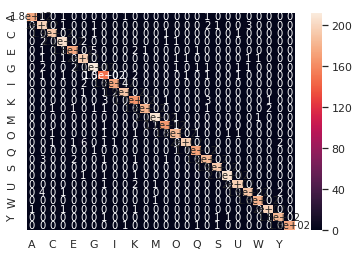

In [165]:
confusion_matrix_plot(letter_test, predicted, alfabeto)